# Презентационный проект по Линейной Регрессии
**Задача 1.**
Подготовка данных, проведение работ с выбросами.

**Задача 2.**
Модель по предсказыванию Целевой переменной.

**Задача 3.**
Понять, применим ли метод Линейной регрессии при работе с нашими данными.


**Импортируем необходимые библиотеки.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Производим импорт Data frame.**

In [2]:
df = pd.read_csv('Linear_Regression_Project_Data.csv')
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


## Подготовка данных, работа с выбросами

**Выброс -** это группа наблюдений координаты которых экстремально отличаются от других наблюдений.

**Выявление признаков.**

Необходимо выявить ряд признаков, которые оказывают ощутимое влияние на Целевую переменную.

Производим поиск признаков через поиск корреляции с Целевой переменной.

In [3]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

**Ряд признаков**

Ввиду высокой корреляции с Целевой переменной, следующие признаки будут рассмотренны на наличие выбросов: Overall Qual, Gr Liv Area

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

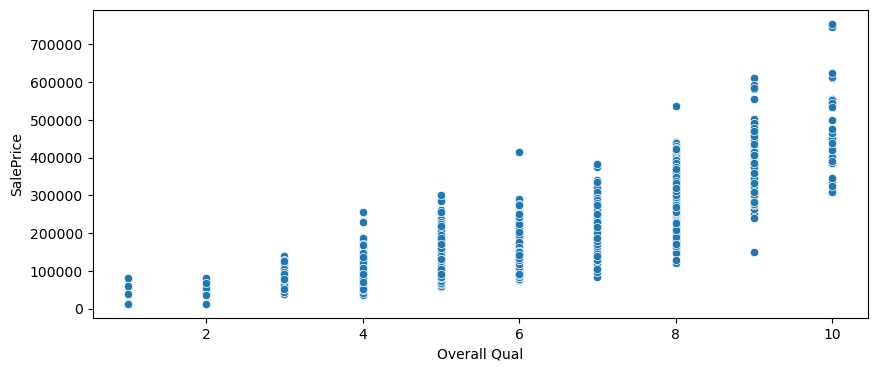

In [4]:
plt.figure(figsize=(10,4), dpi=100)
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

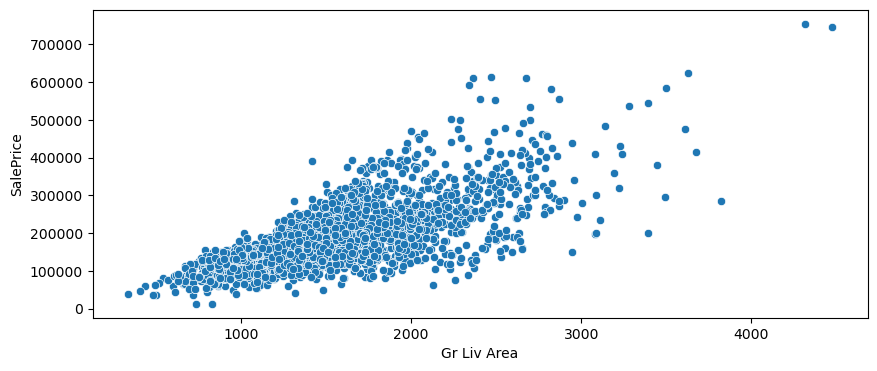

In [5]:
plt.figure(figsize=(10,4), dpi=100)
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

**Получение индексов выбросов.**

В признаках Overall Qual, Gr Liv Area выявлен ряд выбросов.

Необходимо получить индексы данных выбросов с целью дальнейшей работы с ними.

In [6]:
outliers_OverallQual = df[(df['Overall Qual']>8) & (df['SalePrice']<200000)].index
outliers_OverallQual

Index([1182], dtype='int64')

In [7]:
outliers_GrLivArea = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<800000)].index
outliers_GrLivArea

Index([1758, 1765], dtype='int64')

In [8]:
df = df.drop(outliers_OverallQual, axis=0)

In [9]:
df = df.drop(outliers_GrLivArea, axis=0)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

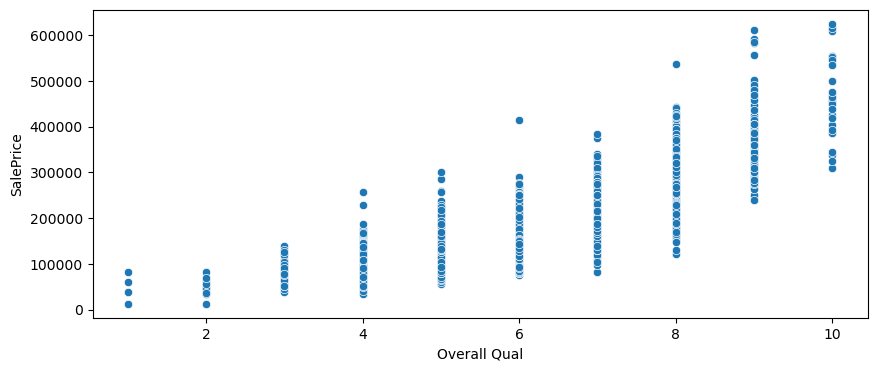

In [10]:
plt.figure(figsize=(10,4), dpi=100)
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

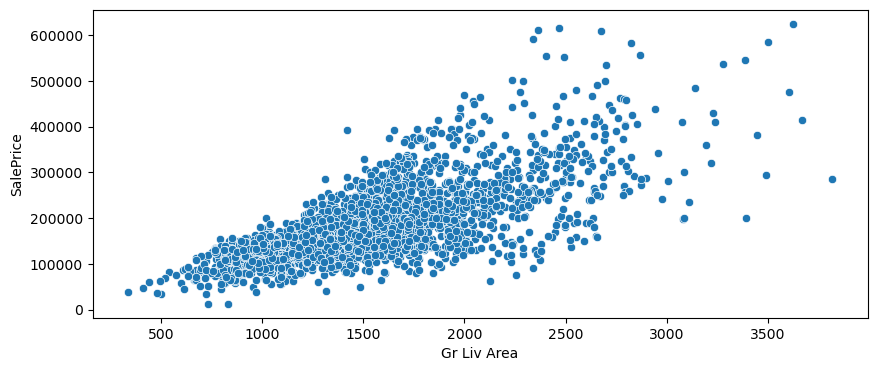

In [11]:
plt.figure(figsize=(10,4), dpi=100)
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

**Работа со значениями Nan.**


Необходимо выявить процентное отношение данных Nan к общему проценту данных признака.

Признаки, процент Nan в которых меньше 1%, заменить на 0.

Удалить все Признаки, где None свыше 60%.

В признаках где значения Nan, 1% < Nan < 60%, заменить Nan на mean().


In [13]:
def percent_missing(my_df):
    result = 100*my_df.isnull().sum() / len(my_df)
    result = result[result>0].sort_values()
    return result

In [14]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

**Значений Nan не обнаружено.**

## Модель по предсказыванию Целевой переменной.

**Делим Data Frame на Признаки - X, Целевую переменную - У.**

In [16]:
X = df.drop('SalePrice', axis=1)

In [17]:
y = df['SalePrice']

**Разделяем Признаки и Целевую переменную на Учебный и Тестовый наборы данных путём случайного перебора.
Под Тестовый набор данных выделено 10% от общего Data Frame.**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Маcштабирование.**  

Маcштабируем признаки Х. Ввиду того, что признаков несколько.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)

In [23]:
scaled_X_test = scaler.transform(X_test)

**Регуляризация.** 

Ищем оптимальные значения бэта, которые минимизируют сумму квадратов ошибок. 

Исользуем Elastic Net - ElasticNet с Кросс Валидацией, с целью перебора ряда значений.

In [25]:
from sklearn.linear_model import ElasticNet

In [26]:
elastic_model = ElasticNet(max_iter=1000000)

In [27]:
param_grid = {'l1_ratio':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1],
                           'alpha':[0.1, 2, 5, 10, 20, 40, 60, 80, 100]}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid_model = GridSearchCV(elastic_model, 
                          param_grid=param_grid,
                          cv=5,
                          verbose=1)

**Обучаем модель.** 

Получаем лучшие гиперпараметры.

In [30]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 2, 5, 10, 20, 40, 60, 80, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 0.95, 0.99, 1]},
             verbose=1)

In [31]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

**Метрики.** 

Оцениваем работу модели.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
y_pred = grid_model.predict(scaled_X_test)

In [34]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

14028.336373371169

In [35]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

19437.896210087445

**Оцениваем работу метрик.** 

Сравниваем со средним значением Целевой переменной.

In [36]:
np.mean(df['SalePrice'])

180436.4979466119

## Понять допустима ли Линейная регрессия при работе с нашими данными.

**Анализ остатков.**

Распределение остатков должно быть ближе к нормальному. Иначе Линейная регрессия не применима к данному набору данных

In [37]:
test_risiduals = y_test - y_pred
test_risiduals

1097      585.641067
59      22688.917246
1627    -5702.089370
2308    12615.874136
721    -12281.837245
            ...     
2568     1642.628275
319      1985.931061
1060     6649.701873
1954    16065.025048
2546     2089.465311
Name: SalePrice, Length: 293, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

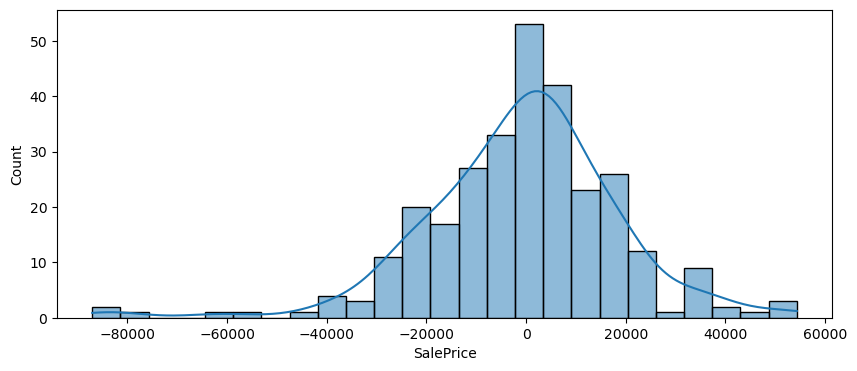

In [38]:
plt.figure(figsize=(10,4), dpi=100)
sns.histplot(test_risiduals, bins = 25, kde = True)

**Итог.** 

Метод Линейной Регрессии применим при работе с нашими данными. 

Поскольку распределение остатков близко к Нормальному распределению.